In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [3]:
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling imdb_reviews-train.tfrecord...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling imdb_reviews-test.tfrecord...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling imdb_reviews-unsupervised.tfrecord...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to C:\Users\benja\tensorflow_datasets\imdb_reviews\subwords8k\1.0.0. Subsequent calls will reuse this data.


In [4]:
train_data, test_data = imdb["train"], imdb["test"]
tokenizer = info.features["text"].encoder

In [5]:
tokenizer.subwords

['the_',
 ', ',
 '. ',
 'a_',
 'and_',
 'of_',
 'to_',
 's_',
 'is_',
 'br',
 'in_',
 'I_',
 'that_',
 'this_',
 'it_',
 ' /><',
 ' />',
 'was_',
 'The_',
 'as_',
 't_',
 'with_',
 'for_',
 '.<',
 'on_',
 'but_',
 'movie_',
 ' (',
 'are_',
 'his_',
 'have_',
 'film_',
 'not_',
 'ing_',
 'be_',
 'ed_',
 'you_',
 ' "',
 'it',
 'd_',
 'an_',
 'he_',
 'by_',
 'at_',
 'one_',
 'who_',
 'y_',
 'from_',
 'e_',
 'or_',
 'all_',
 'like_',
 'they_',
 '" ',
 'so_',
 'just_',
 'has_',
 ') ',
 'her_',
 'about_',
 'out_',
 'This_',
 'some_',
 'ly_',
 'movie',
 'film',
 'very_',
 'more_',
 'It_',
 'would_',
 'what_',
 'when_',
 'which_',
 'good_',
 'if_',
 'up_',
 'only_',
 'even_',
 'their_',
 'had_',
 'really_',
 'my_',
 'can_',
 'no_',
 'were_',
 'see_',
 'she_',
 '? ',
 'than_',
 '! ',
 'there_',
 'get_',
 'been_',
 'into_',
 ' - ',
 'will_',
 'much_',
 'story_',
 'because_',
 'ing',
 'time_',
 'n_',
 'we_',
 'ed',
 'me_',
 ': ',
 'most_',
 'other_',
 'don',
 'do_',
 'm_',
 'es_',
 'how_',
 'also

In [7]:
sample_string = "Tensorflow, from basics to mastery"

tokenized_string = tokenizer.encode(sample_string)
print(f"Tokenized string is: {tokenized_string}")

original_string = tokenizer.decode(tokenized_string)
print(f"The original string is: {original_string}")

Tokenized string is: [6307, 2327, 2934, 2, 48, 4249, 4429, 7, 2652, 8050]
The original string is: Tensorflow, from basics to mastery


In [9]:
for ts in tokenized_string:
    print(f"{ts} --> {tokenizer.decode([ts])}")

6307 --> Ten
2327 --> sor
2934 --> flow
2 --> , 
48 --> from 
4249 --> basi
4429 --> cs 
7 --> to 
2652 --> master
8050 --> y


In [21]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [22]:
embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d_4 ( (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
Total params: 532,289
Trainable params: 532,289
Non-trainable params: 0
_________________________________________________________________


In [23]:
class StopTrain(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get("accuracy") >= 0.94 and logs.get("val_accuracy") > 0.87:
            print("Reached desired accuracy. Stopping training")
            self.model.stop_training = True

callbacks = StopTrain()

num_epochs = 10

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset, callbacks=[callbacks])

Epoch 1/10
391/391 [==============================] - 11s 26ms/step - loss: 0.6207 - accuracy: 0.6475 - val_loss: 0.4528 - val_accuracy: 0.8297
Epoch 2/10
391/391 [==============================] - 11s 28ms/step - loss: 0.3437 - accuracy: 0.8692 - val_loss: 0.3275 - val_accuracy: 0.8727
Epoch 3/10
391/391 [==============================] - 10s 27ms/step - loss: 0.2575 - accuracy: 0.9018 - val_loss: 0.3037 - val_accuracy: 0.8800
Epoch 4/10
391/391 [==============================] - 11s 28ms/step - loss: 0.2159 - accuracy: 0.9206 - val_loss: 0.3016 - val_accuracy: 0.8828
Epoch 5/10
391/391 [==============================] - 11s 27ms/step - loss: 0.1876 - accuracy: 0.9322 - val_loss: 0.3487 - val_accuracy: 0.8600
Epoch 6/10
391/391 [==============================] - 11s 29ms/step - loss: 0.1718 - accuracy: 0.9380 - val_loss: 0.3283 - val_accuracy: 0.8728
Epoch 7/10
391/391 [==============================] - 11s 27ms/step - loss: 0.1508 - accuracy: 0.9482 - val_loss: 0.3640 - val_accuracy:

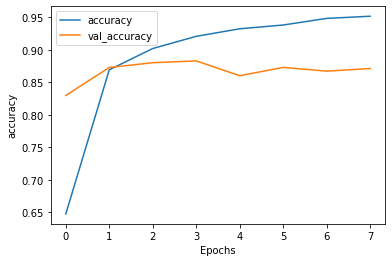

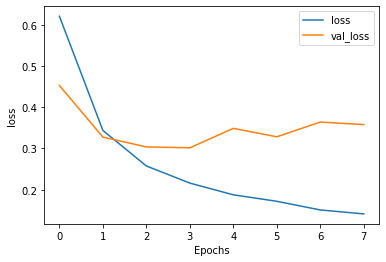

In [24]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [26]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

import io

out_v = io.open('vecs_imdb.tsv', 'w', encoding='utf-8')
out_m = io.open('meta_imdb.tsv', 'w', encoding='utf-8')
for word_num in range(1, tokenizer.vocab_size):
    word = tokenizer.decode([word_num])
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

(8185, 64)


In [27]:
type(train_data)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [29]:
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/subwords8k/1.0.0',
    description="""
    Large Movie Review Dataset.
    This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Uses `tfds.deprecated.text.SubwordTextEncoder` with 8k vocab size
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_path='C:\\Users\\benja\\tensorflow_datasets\\imdb_reviews\\subwords8k\\1.0.0',
    download_size=80.23 MiB,
    dataset_size=54.72 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
    }),
    supervised_keys=('text', 'label'),
    disable_shuf